In [1]:
# 學號：0716026
# 姓名：蕭楚澔

In [1]:
# Import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import statistics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import prettytable as pt
from scipy.stats import norm

In [2]:
# Data input

read_file = pd.read_csv (r'iris.data', header=None)
read_file.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
read_file.to_csv (r'iris.csv', index=None)
ds = pd.read_csv('iris.csv')

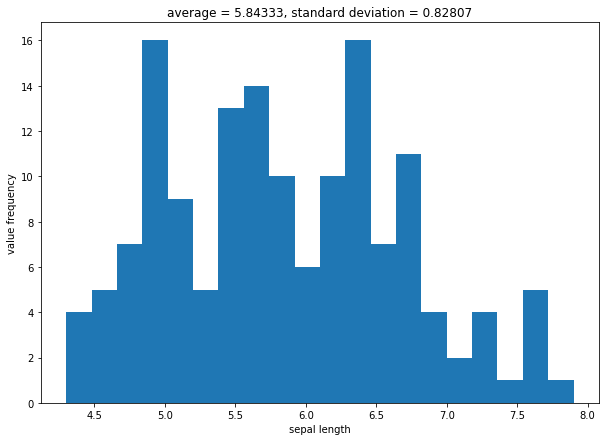

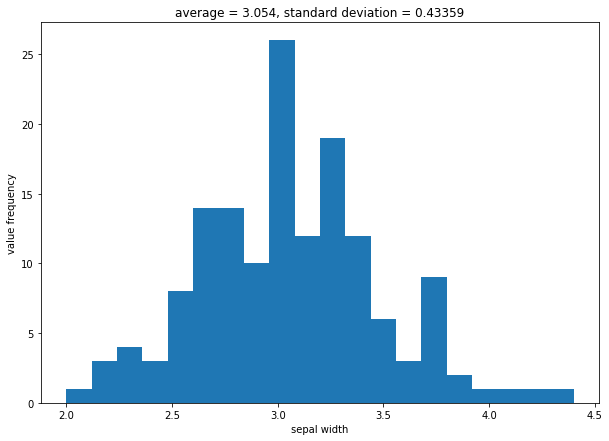

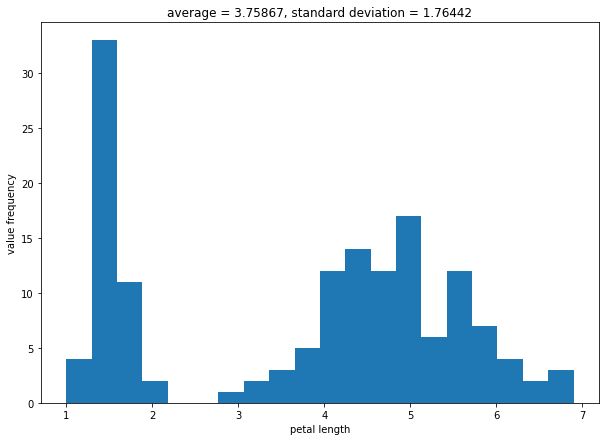

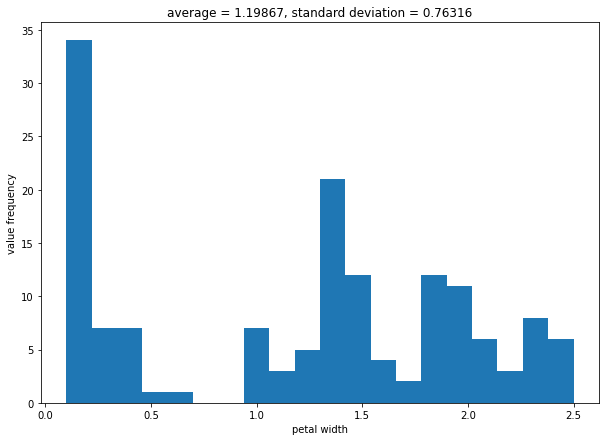

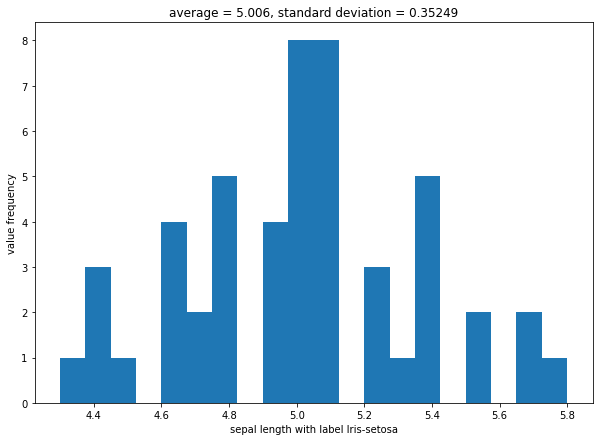

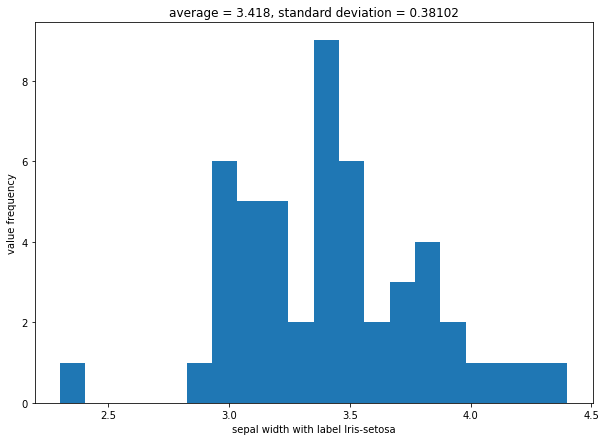

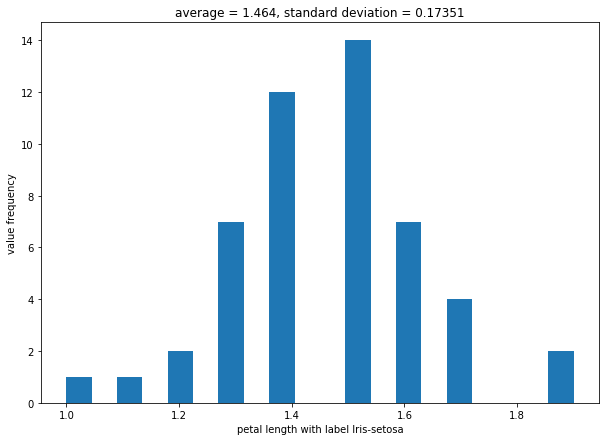

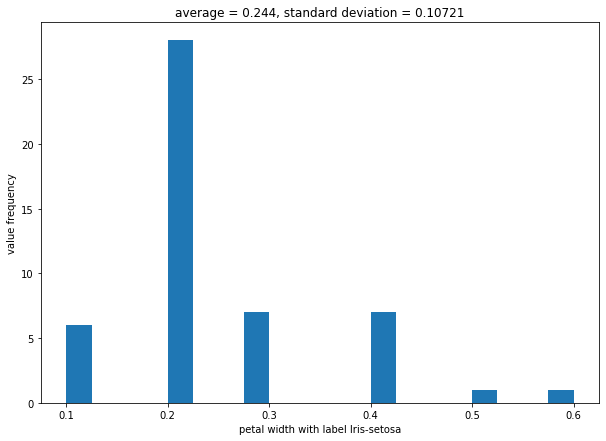

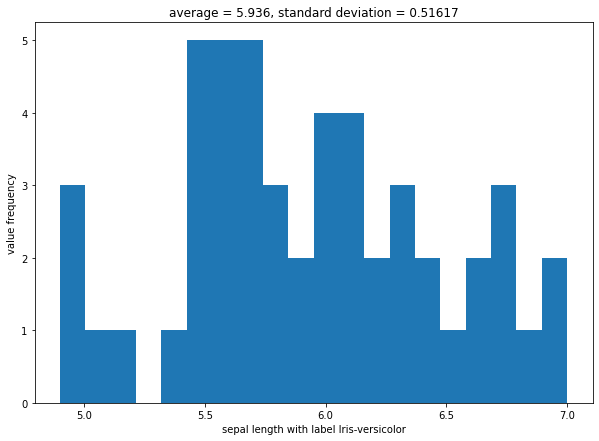

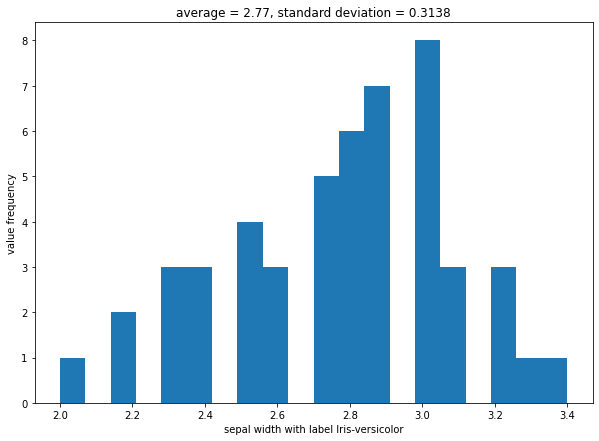

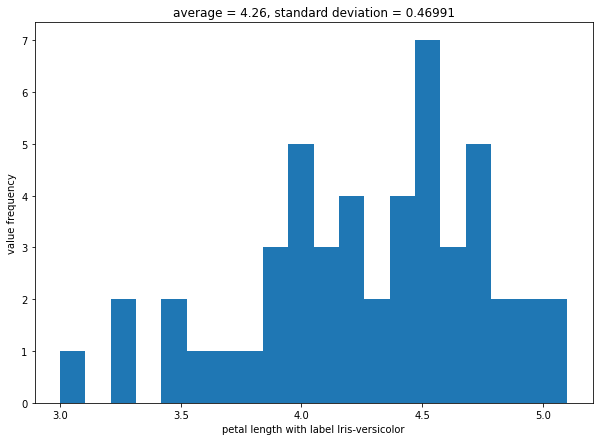

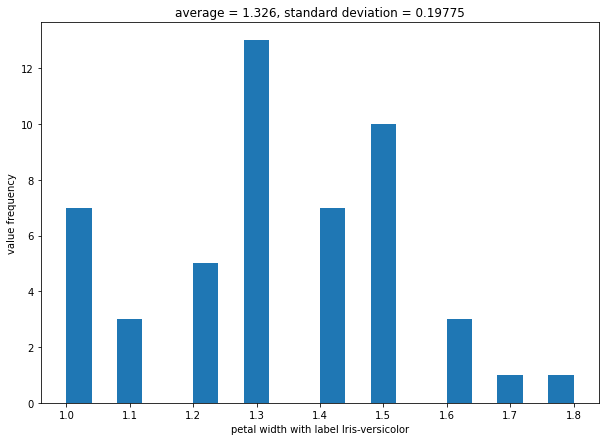

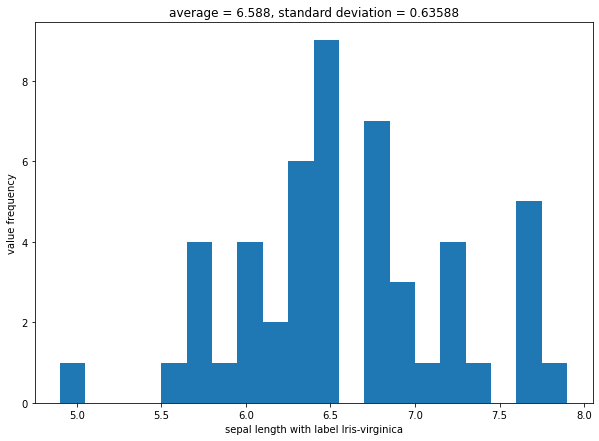

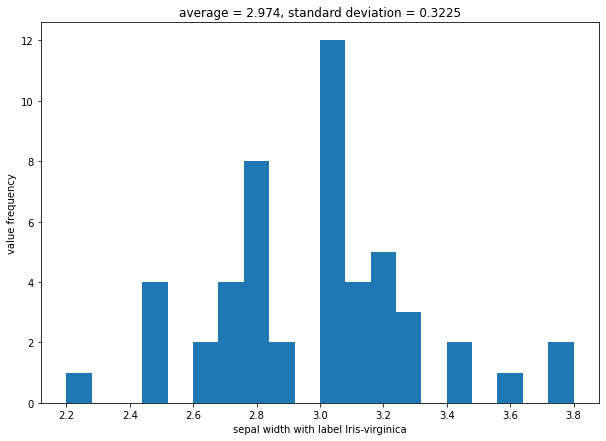

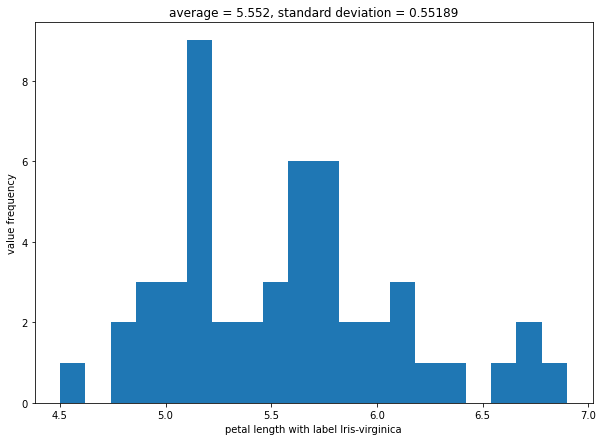

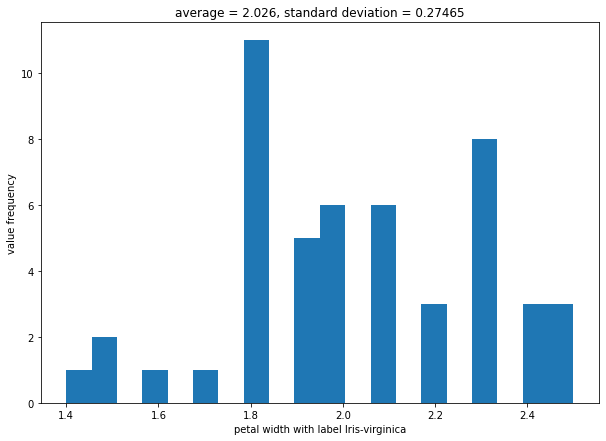

In [4]:
# Data Visulization

# Show the data distribution by average, standard deviation, and value frequency(binning might be needed) of every feature.
feature_index = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

for feature_num in range(0, len(feature_index)-1):
    plt.figure(figsize = (10, 7))
    x = ds[feature_index[feature_num]]
    # show avg and std on the top of chart
    avg = np.around(x.mean(), 5)
    std = np.around(x.std(), 5)

    plt.hist(x, bins = 20)
    plt.title("average = " + str(avg) + ", " + "standard deviation = " + str(std))
    plt.xlabel(feature_index[feature_num])
    plt.ylabel("value frequency")
    
# Split data based on their labels (targets) and show the data distribution of each feature again.
ds_label1 = ds.loc[ds['class'] == 'Iris-setosa']
ds_label2 = ds.loc[ds['class'] == 'Iris-versicolor']
ds_label3 = ds.loc[ds['class'] == 'Iris-virginica']
ds_split = [ds_label1, ds_label2, ds_label3]
label = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

for target_num in range(0, len(ds_split)):
    for feature_num in range(0, len(feature_index)-1):
        plt.figure(figsize = (10, 7))
        x = ds_split[target_num][feature_index[feature_num]]
        # show avg and std on the top of chart
        avg = np.around(x.mean(), 5)
        std = np.around(x.std(), 5)

        plt.hist(x, bins = 20)
        plt.title("average = " + str(avg) + ", " + "standard deviation = " + str(std))
        plt.xlabel(feature_index[feature_num] + " with label " + label[target_num])
        plt.ylabel("value frequency")

In [5]:
# Data Preprocessing

# Transform data format and shape so your model can process them.(finish in data input)

# Drop features with any missing value.
ds.dropna()

# Shuffle the data.
ds = shuffle(ds)

In [6]:
# Model construction

from sklearn.naive_bayes import GaussianNB

In [7]:
# Training and predicting

def Gaussian_classifier(X_train, X_test, y_train, y_test):
    gnb = GaussianNB()
    # train with training data
    gnb.fit(X_train, y_train)
    # predict the result with testing data
    y_pred_gnb = gnb.predict(X_test)
    return y_pred_gnb

In [8]:
# Train test split

# X is data without column 'class'
X = ds.iloc[:, :4].values
# y is data only contain column 'class'
y = ds['class'].values

# Holdout validation
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123)
# predict and get result
y_pred_gnb = Gaussian_classifier(X_train, X_test, y_train, y_test)
# get confusion matrix, accuracy , recall, and precision
confusion_matrix_h = confusion_matrix(y_test, y_pred_gnb)
accuracy_h = accuracy_score(y_test, y_pred_gnb)
recall_h = recall_score(y_test, y_pred_gnb, average='micro')
precision_h = precision_score(y_test, y_pred_gnb, average='micro')

# K-fold cross validation
confusion_matrix_K = []
confusion_matrix_K_sum = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
accuracy_K = []
recall_K = []
precision_K = []
K = 3

kf = KFold(n_splits=K)
for train_index, test_index in kf.split(X):
    # split the data
    X_train_K, X_test_K = X[train_index], X[test_index]
    y_train_K, y_test_K = y[train_index], y[test_index]
    # predict and get the result
    y_pred_K_part = Gaussian_classifier(X_train_K, X_test_K, y_train_K, y_test_K)
    # get confusion matrix, accuracy, recall, and precision
    cm = confusion_matrix(y_test_K, y_pred_K_part)
    acc = accuracy_score(y_test_K, y_pred_K_part)
    rec = recall_score(y_test_K, y_pred_K_part, average='micro')
    pre = precision_score(y_test_K, y_pred_K_part, average='micro')
    confusion_matrix_K.append(cm)
    accuracy_K.append(acc)
    recall_K.append(rec)
    precision_K.append(pre)
    
# calculate average of confusion matrix
for k in range(0, K):
    for i in range(0, 3):
        for j in range(0, 3):
            confusion_matrix_K_sum[i][j] += confusion_matrix_K[k][i][j].item()
            
confusion_matrix_K_sum = np.array(confusion_matrix_K_sum)
confusion_matrix_K_new = confusion_matrix_K_sum/3

In [9]:
# Result

holdout = ["Holdout validation", np.around(confusion_matrix_h, 5), np.around(accuracy_h, 5), np.around(recall_h, 5), np.around(precision_h, 5)]
k_hold = ["K-fold cross validation", np.around(confusion_matrix_K_new, 5), np.around(statistics.mean(accuracy_K), 5), np.around(statistics.mean(recall_K), 5), np.around(statistics.mean(precision_K), 5)]

output = pt.PrettyTable()
output.field_names = ["Method", "Confusion matrix", "Accuracy", "Recall", "Precision"]
output.add_row(holdout)
output.add_row(k_hold)

print("iris result")
print(output)

iris result
+-------------------------+--------------------------------+----------+---------+-----------+
|          Method         |        Confusion matrix        | Accuracy |  Recall | Precision |
+-------------------------+--------------------------------+----------+---------+-----------+
|    Holdout validation   |          [[12  0  0]           | 0.97778  | 0.97778 |  0.97778  |
|                         |           [ 0 14  1]           |          |         |           |
|                         |           [ 0  0 18]]          |          |         |           |
| K-fold cross validation | [[16.66667  0.       0.     ]  | 0.96667  | 0.96667 |  0.96667  |
|                         |  [ 0.      16.       0.66667]  |          |         |           |
|                         |  [ 0.       1.      15.66667]] |          |         |           |
+-------------------------+--------------------------------+----------+---------+-----------+


1. What are the values of 𝜇 and 𝜎 of assumed 𝑃(𝑋𝑝𝑒𝑡𝑎𝑙_𝑙𝑒𝑛𝑔𝑡ℎ|𝑌=Iris Versicolour)
𝜇 =  4.260000000000001
𝜎 =  0.46991097723995795

2. Use a graph to show the probability density function of assumed 𝑃(𝑋𝑝𝑒𝑡𝑎𝑙_𝑙𝑒𝑛𝑔𝑡ℎ|𝑌=Iris Versicolour)


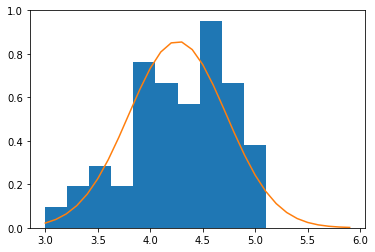

In [10]:
# Questions

# What are the values of 𝜇 and 𝜎 of assumed 𝑃(𝑋𝑝𝑒𝑡𝑎𝑙_𝑙𝑒𝑛𝑔𝑡ℎ|𝑌=Iris Versicolour)?
ds_versicolour = ds.loc[ds['class'] == 'Iris-versicolor']
print("1. What are the values of 𝜇 and 𝜎 of assumed 𝑃(𝑋𝑝𝑒𝑡𝑎𝑙_𝑙𝑒𝑛𝑔𝑡ℎ|𝑌=Iris Versicolour)")
print("𝜇 = ", ds_versicolour['petal length'].mean())
print("𝜎 = ", ds_versicolour['petal length'].std())

# Use a graph to show the probability density function of assumed 𝑃(𝑋𝑝𝑒𝑡𝑎𝑙_𝑙𝑒𝑛𝑔𝑡ℎ|𝑌=Iris Versicolour)
p = ds_versicolour['petal length']
p = p.to_list()
p = np.array(p)
p_mean = p.mean()
p_std = p.std()
dist = norm(p_mean, p_std)
values = [value for value in np.arange(3.0, 6.0, 0.1)]
probabilities = [dist.pdf(value) for value in values]

print("\n2. Use a graph to show the probability density function of assumed 𝑃(𝑋𝑝𝑒𝑡𝑎𝑙_𝑙𝑒𝑛𝑔𝑡ℎ|𝑌=Iris Versicolour)")
plt.hist(p, bins=10, density=True)
plt.plot(values, probabilities)
plt.show()